# ECS 174 HW1

## Section 1: Coding Assignment

1. Implement the function GaussianBlurImage(image, sigma) to Gaussian blur an image.
“sigma” is the standard deviation of the Gaussian. Implement the Gaussian blur using a 2D filter.
Required: Gaussian blur the image “Seattle.jpg” with a sigma of 4.0, and save as “1.png”.

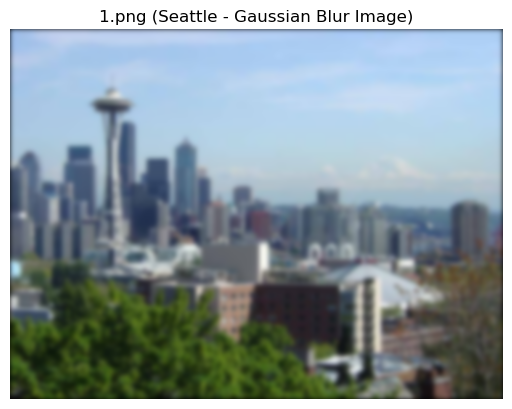

In [46]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

#taken from HW1 starter code
def img_save(img_array, file_name, title='', show=True, cmap=None):
    if show:
        plt.imshow(img_array.astype(np.uint8), cmap=cmap)
        plt.title(title)
        plt.axis('off')
        plt.show()
    plt.imsave(file_name, img_array.astype(np.uint8), cmap=cmap)

def convolution(image, filter):
    img_convolved = np.zeros_like(image, dtype=np.float32)
    pad_width = filter.shape[0] // 2
    padded_image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), mode='constant')
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + filter.shape[0], j:j + filter.shape[1]]
            for k in range(image.shape[2]): 
                img_convolved[i, j, k] = np.sum(region[:, :, k] * filter)
    
    return img_convolved

#taken from filtering.ipynb from website 
def GaussianBlurImage(image, sigma):
    
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            gaussian_filter[i, j] = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
            
    gaussian_filter /= gaussian_filter.sum()

    blurred_image = convolution(image, gaussian_filter)
    return blurred_image

#taken from HW1 starter code
img_seattle = Image.open('/Users/shreyamaddhali/Desktop/ECS 174/Seattle.jpg')
img_seattle = np.array(img_seattle).astype(np.uint8)
img_1 = GaussianBlurImage(img_seattle, sigma=4.0)
img_save(img_1, '1.png', '1.png (Seattle - Gaussian Blur Image)', show=True)


2. Implement the function SeparableGaussianBlurImage (image, sigma) to Gaussian blur an
image using separable filters. “sigma” is the standard deviation of the Gaussian. The separable filter
should first Gaussian blur the image horizontally, followed by blurring the image vertically. The final
image should look the same as when blurring the image with GaussianBlurImage.
Required: Gaussian blur the image “Seattle.jpg” with a sigma of 4.0, and save as “2.png”

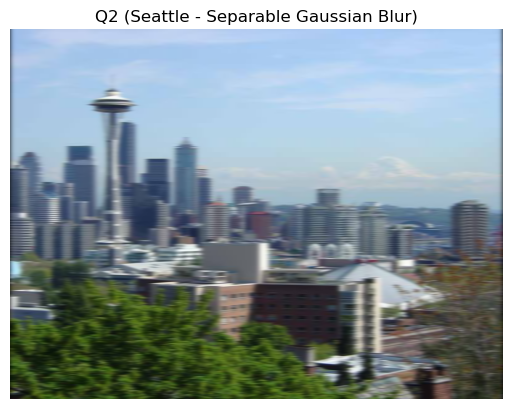

In [50]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def img_save(img_array, file_name, title='', show=True, cmap=None):
    if show:
        plt.imshow(img_array.astype(np.uint8), cmap=cmap)
        plt.title(title)
        plt.axis('off')
        plt.show()
    plt.imsave(file_name, img_array.astype(np.uint8), cmap=cmap)


# Function for 1D (rows),  transpose for columns in sep function
def conv_rows(image, filter):
    img_convolved = np.zeros_like(image, dtype=np.float32)

    pad_width = filter.shape[0] // 2
    
    padded_image = np.pad(image, ((0, 0), (pad_width, pad_width)), mode='constant')

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i, j:j + filter.shape[0]]
            img_convolved[i, j] = np.sum(region * filter)

    return img_convolved

def SeparableGaussianBlurImage(image, sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    n = filter_size // 2

    # 1D Gaussian filter for horizontal blur
    filter_x = np.zeros((filter_size,), np.float32)  
    for y in range(-n, n + 1):
        x1 = np.sqrt(2 * np.pi * (sigma ** 2))
        x2 = np.exp(-(y ** 2) / (2 * sigma ** 2))
        filter_x[y + n] = (1 / x1) * x2
 
    img_blurred = conv_rows(image, filter_x)   
    
    # Transpose filter_x to create filter_y 
    filter_y = filter_x[:, np.newaxis] 
    img_blurred = conv_rows(img_blurred, filter_y.T)  

    return img_blurred.astype(np.uint8)

img_seattle = Image.open('/Users/shreyamaddhali/Desktop/ECS 174/Seattle.jpg')
# img_seattle = img_seattle.convert('L')  
img_seattle = np.array(img_seattle).astype(np.uint8)


#iterate through each of the color channels, otherwise it will only be 1D

w, h = img_seattle.shape[1], img_seattle.shape[0]
img_2 = np.zeros((h, w, 3))
for i in range(3):
    temp = SeparableGaussianBlurImage(img_seattle[:, :, i], sigma=4.0)
    img_2[:, :, i] = temp
    
img_save(img_2, '2.png', 'Q2 (Seattle - Separable Gaussian Blur)', show=True)


3. Implement SobelImage(image) to compute horizontal and vertical edges, edge magnitude,
and edge orientation information. SobelImage should display the outputs in an image. You may
convert color image into a gray scale image and then run the filter on that.
Required: Compute Sobel edge filter on “LadyBug.jpg” and save as 5a, 5b, 5c, and 5d “.png”. You
may use cmap = plt.cm.hsv to save orientation and cmap=‘gray’ to rest of images.

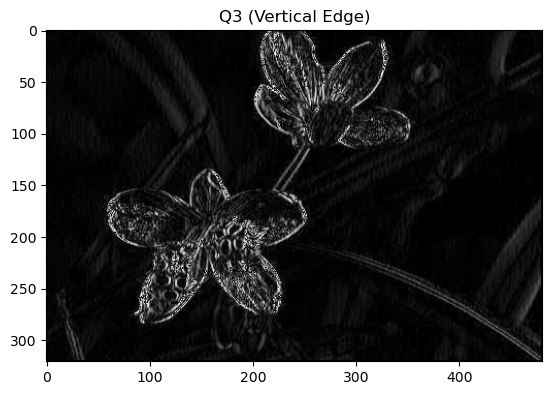

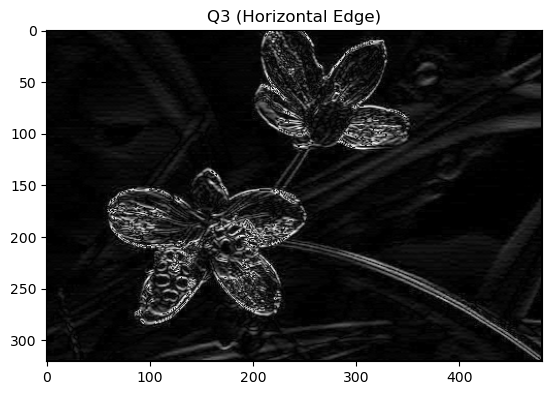

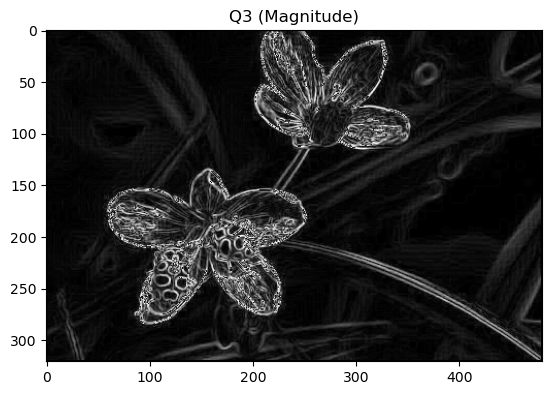

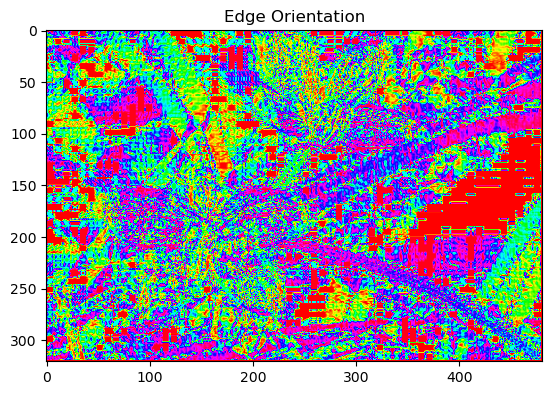

In [52]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def img_save(img_array, file_name, title='', show=True, cmap=None):
    if show:
        plt.imshow(img_array.astype(np.uint8), cmap=cmap)
        plt.title(title)
        plt.axis('on')
        plt.show()
    plt.imsave(file_name, img_array.astype(np.uint8), cmap=cmap)

def SobelImage(image):
    #arrays given from slides with the 2D tensor values
    Gx = np.array([[-1.0, 0.0, 1.0], 
                   [-2.0, 0.0, 2.0], 
                   [-1.0, 0.0, 1.0]])
    Gy = np.array([[-1.0, -2.0, -1.0], 
                   [0.0, 0.0, 0.0], 
                   [1.0, 2.0, 1.0]])

    rows, columns = image.shape
    vertical_edge = np.zeros((rows, columns))
    horizontal_edge = np.zeros((rows, columns))
    magnitude = np.zeros((rows, columns))
    orientation = np.zeros((rows, columns))

    for i in range(1, rows - 1):
        for j in range(1, columns - 1):
            gx = np.sum(Gx * image[i-1:i+2, j-1:j+2])  
            gy = np.sum(Gy * image[i-1:i+2, j-1:j+2])   

            vertical_edge[i, j] = gx
            horizontal_edge[i, j] = gy
            
            magnitude[i, j] = np.sqrt(gx ** 2 + gy ** 2)
            orientation[i, j] = np.arctan2(gy, gx)   

    return abs(vertical_edge), abs(horizontal_edge), magnitude, orientation

img_ladybug = Image.open('/Users/shreyamaddhali/Desktop/ECS 174/LadyBug.jpg').convert('L')  
img_ladybug = np.array(img_ladybug).astype(np.uint8)

vertical_edge, horizontal_edge, magnitude, orientation = SobelImage(img_ladybug)

theta = np.arctan(horizontal_edge / (vertical_edge + 1e-5))

plt.imsave('5a.png', vertical_edge, cmap='gray')   
img_save(vertical_edge, '5a.png', 'Q3 (Vertical Edge)', show=True, cmap='gray')

plt.imsave('5b.png', horizontal_edge, cmap='gray')   
img_save(horizontal_edge, '5b.png', 'Q3 (Horizontal Edge)', show=True, cmap='gray')

plt.imsave('5c.png', magnitude, cmap='gray')   
img_save(magnitude, '5c.png', 'Q3 (Magnitude)', show=True, cmap='gray')

plt.imshow(theta, cmap=plt.cm.hsv)   
plt.title('Edge Orientation')
plt.show()
plt.imsave('5d.png', orientation, cmap=plt.cm.hsv) 

4. Implement BilinearInterpolation(image, x, y) to compute the linearly interpolated pixel
value at (x, y). Both x and y are continuous values.
Required: Upsample image “Moire small.jpg” to be 4 times larger in each direction (16 times more
image area) once with nearest neighbor interpolation and save as “6a.png” and once with bilinear
interpolation and save as “6b.png”.

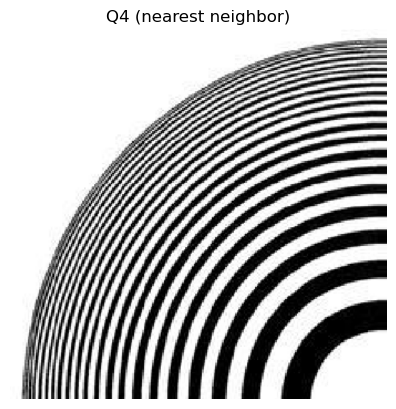

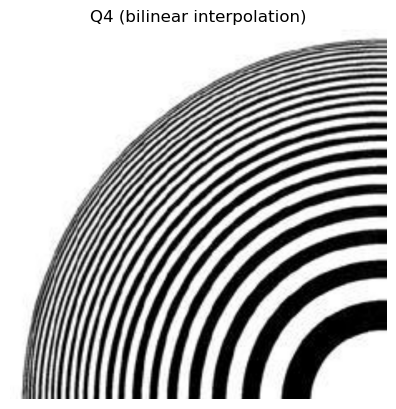

In [54]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

def img_save(img_array, file_name, title='', show=True, cmap=None):
    if show:
        plt.imshow(img_array.astype(np.uint8), cmap=cmap)
        plt.title(title)
        plt.axis('off')
        plt.show()
    plt.imsave(file_name, img_array.astype(np.uint8), cmap=cmap)

def NNInterpolation(image, x, y):
    x1 = round(x)
    y1 = round(y)
    
    x1 = np.clip(x1, 0, image.shape[0] - 1)
    y1 = np.clip(y1, 0, image.shape[1] - 1)

    pixel_val = image[x1, y1, :]
    
    return pixel_val

def BilinearInterpolation(image, x, y):
    x1 = int(np.floor(x))
    y1 = int(np.floor(y))
    
    x1 = np.clip(x1, 0, image.shape[0] - 1)
    y1 = np.clip(y1, 0, image.shape[1] - 1)
    
    x2 = min(x1 + 1, image.shape[0] - 1)
    y2 = min(y1 + 1, image.shape[1] - 1)

    a = x - x1
    b = y - y1

    pixel_val= (image[x1, y1, :] * (1 - a) * (1 - b) +
                   image[x2, y1, :] * a * (1 - b) +
                   image[x1, y2, :] * (1 - a) * b +
                   image[x2, y2, :] * a * b)

    return pixel_val

def UpSampling(image, factor, interpolation):
    width_up = image.shape[1] * factor
    height_up = image.shape[0] * factor

    img_upsampled = np.zeros((height_up, width_up, image.shape[2]), dtype=np.uint8)

    for i in range(height_up):
        for j in range(width_up):
            x = j / factor
            y = i / factor
            if interpolation == "Bilinear":
                img_upsampled[i][j] = BilinearInterpolation(image, x, y)
            else:
                img_upsampled[i][j] = NNInterpolation(image, x, y)

    return img_upsampled

img_moire = Image.open('/Users/shreyamaddhali/Desktop/ECS 174/Moire_small.jpg')
img_moire = np.array(img_moire).astype(np.uint8)
moire_nn = UpSampling(img_moire, factor=4, interpolation="NN")
moire_bilinear = UpSampling(img_moire, factor=4, interpolation="Bilinear")
img_save(moire_nn, '6a.png', 'Q4 (nearest neighbor)', show=True)
img_save(moire_bilinear, '6b.png', 'Q4 (bilinear interpolation)', show=True)


## Section 2: Written Portion

1. What is the best amount of blur to apply when down-sampling Moire.jpg by 8x (pressing
“Half Size” 3 times)? Does down-sampling “Seattle.jpg” require the same amount of blur? You may
use different amounts of “sigma” for each image and report your observation

Downsample image itself and run gaussian blur, resize

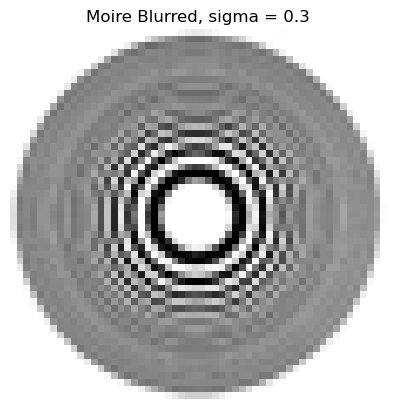

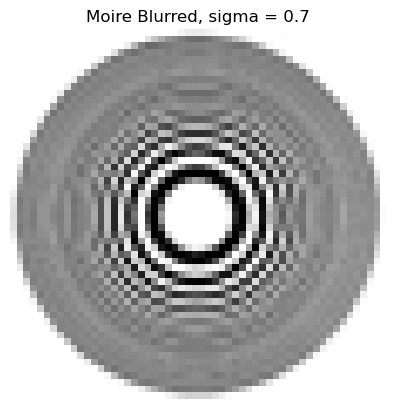

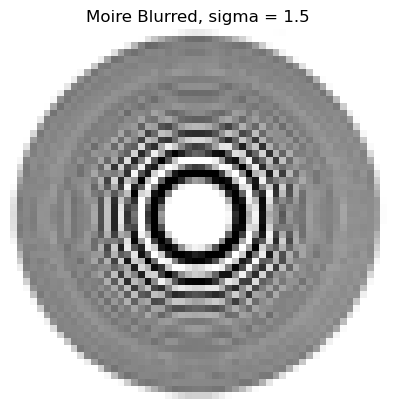

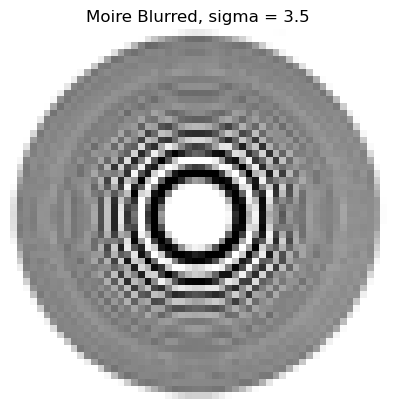

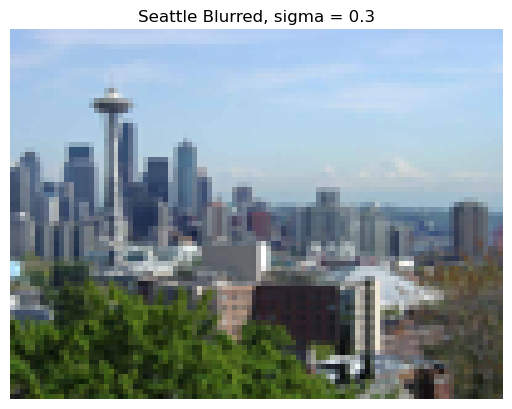

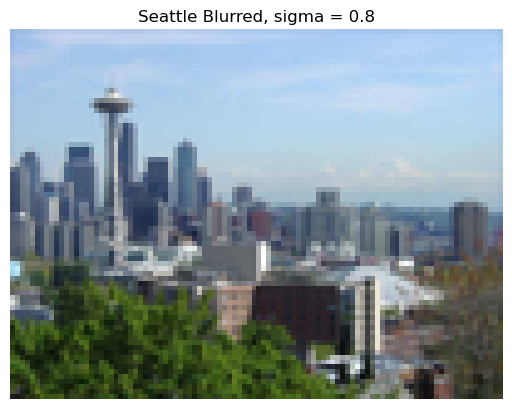

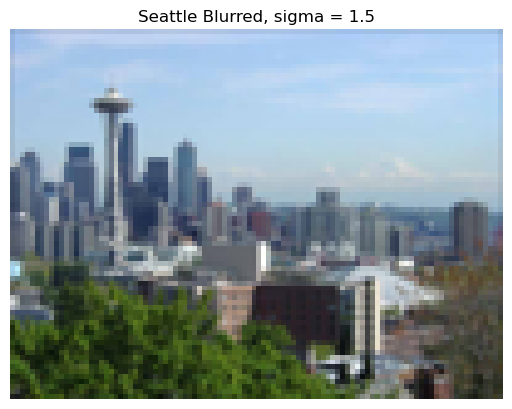

In [56]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#convolution function from above (#1)
def convolution(image, filter):
    img_convolved = np.zeros_like(image, dtype=np.float32)
    pad_width = filter.shape[0] // 2
    padded_image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width)), mode='constant')
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + filter.shape[0], j:j + filter.shape[1]]
            img_convolved[i, j] = np.sum(region * filter)
    
    return img_convolved

#GaussianBlur function from above (#1)
def GaussianBlurImage(image, sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
    
    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            gaussian_filter[i, j] = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    
    gaussian_filter /= gaussian_filter.sum()
    
    blurred_image = convolution(image, gaussian_filter)
    return blurred_image


def downsample(image_path, sigma, factor):
    image = Image.open(image_path).convert('RGB')   
    image = np.array(image).astype(np.uint8)

    blurred = []

    # similar to for loop used in the separable Gaussian, iterate over each color channel
    for channel in range(3):
        blurred_1 = GaussianBlurImage(image[:, :, channel], sigma)
        blurred.append(blurred_1)

    blurred_img = np.stack(blurred, axis=2)

    new_size = (image.shape[1] // factor, image.shape[0] // factor)
    downsampled_img = Image.fromarray(blurred_img.astype(np.uint8)).resize(new_size)

    return np.array(downsampled_img)  

def img_save(img_array, file_name, title='', show=True, cmap=None):
    if show:
        plt.imshow(img_array.astype(np.uint8), cmap=cmap)
        plt.title(title)
        plt.axis('off')
        plt.show()
    plt.imsave(file_name, img_array.astype(np.uint8), cmap=cmap)

moir_blurred = downsample('/Users/shreyamaddhali/Desktop/ECS 174/Moire.jpg', sigma=0.3, factor=8)
img_save(moir_blurred, '/Users/shreyamaddhali/Desktop/ECS 174/Moire_blurred.jpg', title='Moire Blurred, sigma = 0.3')

moir_blurred1 = downsample('/Users/shreyamaddhali/Desktop/ECS 174/Moire.jpg', sigma=0.7, factor=8)
img_save(moir_blurred, '/Users/shreyamaddhali/Desktop/ECS 174/Moire_blurred1.jpg', title='Moire Blurred, sigma = 0.7')

moir_blurred2 = downsample('/Users/shreyamaddhali/Desktop/ECS 174/Moire.jpg', sigma=1.5, factor=8)
img_save(moir_blurred, '/Users/shreyamaddhali/Desktop/ECS 174/Moire_blurred2.jpg', title='Moire Blurred, sigma = 1.5')

moir_blurred3 = downsample('/Users/shreyamaddhali/Desktop/ECS 174/Moire.jpg', sigma=3.5, factor=8)
img_save(moir_blurred, '/Users/shreyamaddhali/Desktop/ECS 174/Moire_blurred3.jpg', title='Moire Blurred, sigma = 3.5')

seattle_blurred = downsample('/Users/shreyamaddhali/Desktop/ECS 174/Seattle.jpg', sigma=0.3, factor=8)
img_save(seattle_blurred, '/Users/shreyamaddhali/Desktop/ECS 174/Seattle_blurred.jpg', title='Seattle Blurred, sigma = 0.3')

seattle_blurred = downsample('/Users/shreyamaddhali/Desktop/ECS 174/Seattle.jpg', sigma=0.8, factor=8)
img_save(seattle_blurred, '/Users/shreyamaddhali/Desktop/ECS 174/Seattle_blurred1.jpg', title='Seattle Blurred, sigma = 0.8')

seattle_blurred = downsample('/Users/shreyamaddhali/Desktop/ECS 174/Seattle.jpg', sigma=1.5, factor=8)
img_save(seattle_blurred, '/Users/shreyamaddhali/Desktop/ECS 174/Seattle_blurred2.jpg', title='Seattle Blurred, sigma = 1.5')

#### Write-up for Question 1

I tested out different sigma levels for both Moire and the Seattle images. 

Moire Tests
- Sigma = 0.3: wasn't able to see much of a blur
- Sigma = 0.7: same as 0.3 level
- Sigma = 1.5: we see a decent blur that does not have too much aliasing and did not blur the details of the image
- Sigma  = 3.5: most effective blur, starts to blur out important details in the image
  
Seattle Tests
Seattle Tests:
- Sigma = 0.3: keeps most of the details of the skyline image
- Sigma = 0.8: see more of a blur but the higher sigma helps blur the noise
- Sigma = 1.5: not able to see much of the skyline properly, would not recommend such a high sigma

Overall decision: for Moire, try to use a sigma that is in between 1.5 - 3.5 and for Seattle, use a sigma that is between 0.3 and 0.8 to make sure you have an effective blur without getting rid of details. The two images cannot use the same sigma level because the images are of two completely different things: one is a geometric shape that is grayscale and the other is a skyline that has lots of color and differently shaped buildings.


2.  If you rotate the image 20 times by 2 degrees, does it produce the same result as rotating
the image by 40 degrees? If not, why? You may use built-in function rotate() to rotate the image.

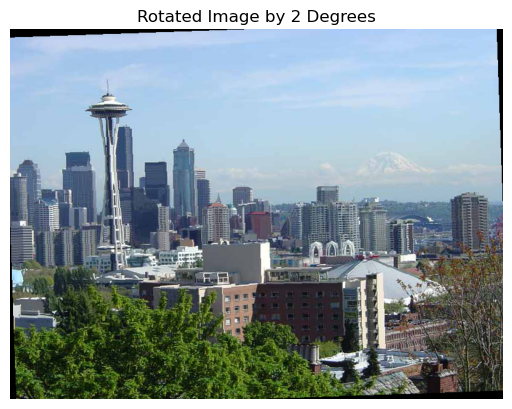

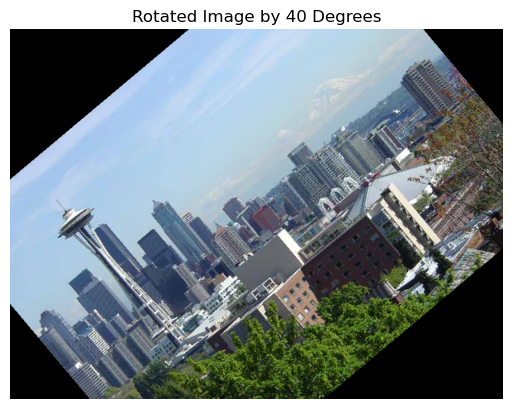

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = Image.open('/Users/shreyamaddhali/Desktop/ECS 174/Seattle.jpg')

# Rotate the image 20 times at 2 degrees
for i in range(20):
    rotated_img2 = img.rotate(2)

rotated_img2.save('/Users/shreyamaddhali/Desktop/ECS 174/rotated_image2.jpg')  

plt.imshow(rotated_img2)
plt.title('Rotated Image by 2 Degrees')
plt.axis('off')  
plt.show()


# Rotate the image 1 times at 40 degrees
for i in range(1):
    rotated_img40 = img.rotate(40)

rotated_img40.save('/Users/shreyamaddhali/Desktop/ECS 174/rotated_image40.jpg')  

plt.imshow(rotated_img40)
plt.title('Rotated Image by 40 Degrees')
plt.axis('off')   
plt.show()



#### Write-up for Question 2
If we rotate an image by 2 degrees versus 40 degrees 20 times, we see that the results are NOT the same. When we are rotating these images, interpolation is occurring because when the orientation changes 20 times, the pixels are going to have distortions. Resampling is occuring whenever we rotate the images to when we are doing the 2 degree rotation 20 times, the result will be completely different from doing one rotation that is 40 degrees.